<h1>Group 5</h1>

<h3>HW 3</h3>

<h3>Grayson Felt, Hayden Clegg, Beau Denhalter, Mitchell Green, Tommy Martineau</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


The 'default.payment.next.month' column name is too long, lets rename it

In [3]:
df.rename(columns={"default.payment.next.month": "DEFAULT"}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

The 'ID' column is just an iterator, we can remove it

In [5]:
del df['ID']

Checking for duplicates and removing them

In [6]:
sum(df.duplicated())

35

In [7]:
df.drop_duplicates(df.columns, keep='last', inplace = True)

In [9]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT']:
    print(df[col].value_counts())

2    18091
1    11874
Name: SEX, dtype: int64
2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64
0    23335
1     6630
Name: DEFAULT, dtype: int64


All three of the above variables can be cast as categorical

In [10]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT']:
    df[col] = df[col].astype('category')

To improve overall clarity in this data set, we will rename the PAY_, BILL_AMT, and PAY_AMT, variables

In [11]:
df.rename(columns={"PAY_0": "PAY_SEPT"}, inplace=True)
df.rename(columns={"PAY_2": "PAY_AUG"}, inplace=True)
df.rename(columns={"PAY_3": "PAY_JUL"}, inplace=True)
df.rename(columns={"PAY_4": "PAY_JUN"}, inplace=True)
df.rename(columns={"PAY_5": "PAY_MAY"}, inplace=True)
df.rename(columns={"PAY_6": "PAY_APR"}, inplace=True)

df.rename(columns={"BILL_AMT1": "BILL_AMT_SEPT"}, inplace=True)
df.rename(columns={"BILL_AMT2": "BILL_AMT_AUG"}, inplace=True)
df.rename(columns={"BILL_AMT3": "BILL_AMT_JUL"}, inplace=True)
df.rename(columns={"BILL_AMT4": "BILL_AMT_JUN"}, inplace=True)
df.rename(columns={"BILL_AMT5": "BILL_AMT_MAY"}, inplace=True)
df.rename(columns={"BILL_AMT6": "BILL_AMT_APR"}, inplace=True)

df.rename(columns={"PAY_AMT1": "PAY_AMT_SEPT"}, inplace=True)
df.rename(columns={"PAY_AMT2": "PAY_AMT_AUG"}, inplace=True)
df.rename(columns={"PAY_AMT3": "PAY_AMT_JUL"}, inplace=True)
df.rename(columns={"PAY_AMT4": "PAY_AMT_JUN"}, inplace=True)
df.rename(columns={"PAY_AMT5": "PAY_AMT_MAY"}, inplace=True)
df.rename(columns={"PAY_AMT6": "PAY_AMT_APR"}, inplace=True)

In [32]:
pay_cols = ['PAY_APR', 'PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEPT']
for col in pay_cols:
    print(df[col].value_counts())

0     16286
-1     5736
-2     4865
2      2766
3       184
4        48
7        46
6        19
5        13
8         2
Name: PAY_APR, dtype: int64
0     16947
-1     5535
-2     4516
2      2626
3       178
4        83
7        58
5        17
6         4
8         1
Name: PAY_MAY, dtype: int64
0     16455
-1     5683
-2     4318
2      3159
3       180
4        68
7        58
5        35
6         5
8         2
1         2
Name: PAY_JUN, dtype: int64
0     15764
-1     5934
-2     4055
2      3819
3       240
4        75
7        27
6        23
5        21
1         4
8         3
Name: PAY_JUL, dtype: int64
0     15730
-1     6046
2      3926
-2     3752
3       326
4        99
1        28
5        25
7        20
6        12
8         1
Name: PAY_AUG, dtype: int64
0     14737
-1     5682
1      3667
-2     2750
2      2666
3       322
4        76
5        26
8        19
6        11
7         9
Name: PAY_SEPT, dtype: int64


The 'PAY_' columns can also be cast as categorical

In [13]:
for col in pay_cols:
    df[col] = df[col].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   LIMIT_BAL      29965 non-null  float64 
 1   SEX            29965 non-null  category
 2   EDUCATION      29965 non-null  category
 3   MARRIAGE       29965 non-null  category
 4   AGE            29965 non-null  int64   
 5   PAY_SEPT       29965 non-null  category
 6   PAY_AUG        29965 non-null  category
 7   PAY_JUL        29965 non-null  category
 8   PAY_JUN        29965 non-null  category
 9   PAY_MAY        29965 non-null  category
 10  PAY_APR        29965 non-null  category
 11  BILL_AMT_SEPT  29965 non-null  float64 
 12  BILL_AMT_AUG   29965 non-null  float64 
 13  BILL_AMT_JUL   29965 non-null  float64 
 14  BILL_AMT_JUN   29965 non-null  float64 
 15  BILL_AMT_MAY   29965 non-null  float64 
 16  BILL_AMT_APR   29965 non-null  float64 
 17  PAY_AMT_SEPT   29965 non-null  

Looking at the definitions, 'EDUCATION' and 'MARRIAGE' have categories that can be grouped together

First, with 'MARRIAGE' 0 = other, 1 = married, 2 = single, 3 = other

We should group 3 into the 0 category

In [15]:
df['MARRIAGE']=np.where(df['MARRIAGE'] == 3, 0, df['MARRIAGE'])
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['MARRIAGE'].unique()

[1, 2, 0]
Categories (3, int64): [1, 2, 0]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   LIMIT_BAL      29965 non-null  float64 
 1   SEX            29965 non-null  category
 2   EDUCATION      29965 non-null  category
 3   MARRIAGE       29965 non-null  category
 4   AGE            29965 non-null  int64   
 5   PAY_SEPT       29965 non-null  category
 6   PAY_AUG        29965 non-null  category
 7   PAY_JUL        29965 non-null  category
 8   PAY_JUN        29965 non-null  category
 9   PAY_MAY        29965 non-null  category
 10  PAY_APR        29965 non-null  category
 11  BILL_AMT_SEPT  29965 non-null  float64 
 12  BILL_AMT_AUG   29965 non-null  float64 
 13  BILL_AMT_JUL   29965 non-null  float64 
 14  BILL_AMT_JUN   29965 non-null  float64 
 15  BILL_AMT_MAY   29965 non-null  float64 
 16  BILL_AMT_APR   29965 non-null  float64 
 17  PAY_AMT_SEPT   29965 non-null  

Now looking at 'EDUCATION', 0 = unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

4, 5, and 6 can be grouped into 0

In [17]:
for val in [4, 5, 6]:
    df['EDUCATION']=np.where(df['EDUCATION'] == val, 0, df['EDUCATION'])
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['EDUCATION'].unique()

[2, 1, 3, 0]
Categories (4, int64): [2, 1, 3, 0]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   LIMIT_BAL      29965 non-null  float64 
 1   SEX            29965 non-null  category
 2   EDUCATION      29965 non-null  category
 3   MARRIAGE       29965 non-null  category
 4   AGE            29965 non-null  int64   
 5   PAY_SEPT       29965 non-null  category
 6   PAY_AUG        29965 non-null  category
 7   PAY_JUL        29965 non-null  category
 8   PAY_JUN        29965 non-null  category
 9   PAY_MAY        29965 non-null  category
 10  PAY_APR        29965 non-null  category
 11  BILL_AMT_SEPT  29965 non-null  float64 
 12  BILL_AMT_AUG   29965 non-null  float64 
 13  BILL_AMT_JUL   29965 non-null  float64 
 14  BILL_AMT_JUN   29965 non-null  float64 
 15  BILL_AMT_MAY   29965 non-null  float64 
 16  BILL_AMT_APR   29965 non-null  float64 
 17  PAY_AMT_SEPT   29965 non-null  

Now looking at null values:

In [19]:
null_pct = df.isnull().sum() / len(df)
null_pct

LIMIT_BAL        0.0
SEX              0.0
EDUCATION        0.0
MARRIAGE         0.0
AGE              0.0
PAY_SEPT         0.0
PAY_AUG          0.0
PAY_JUL          0.0
PAY_JUN          0.0
PAY_MAY          0.0
PAY_APR          0.0
BILL_AMT_SEPT    0.0
BILL_AMT_AUG     0.0
BILL_AMT_JUL     0.0
BILL_AMT_JUN     0.0
BILL_AMT_MAY     0.0
BILL_AMT_APR     0.0
PAY_AMT_SEPT     0.0
PAY_AMT_AUG      0.0
PAY_AMT_JUL      0.0
PAY_AMT_JUN      0.0
PAY_AMT_MAY      0.0
PAY_AMT_APR      0.0
DEFAULT          0.0
dtype: float64

Thankfully, there are none! 

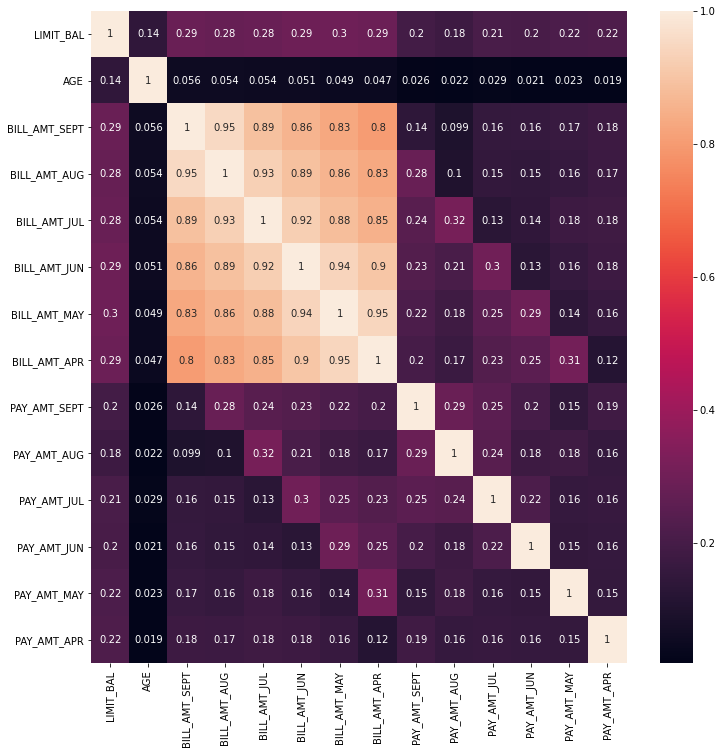

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [21]:
1 - (len(df[df['DEFAULT']==1])/len(df[df['DEFAULT']==0]))

0.7158774373259054

Above 71% of this data set consists of non-default payment records

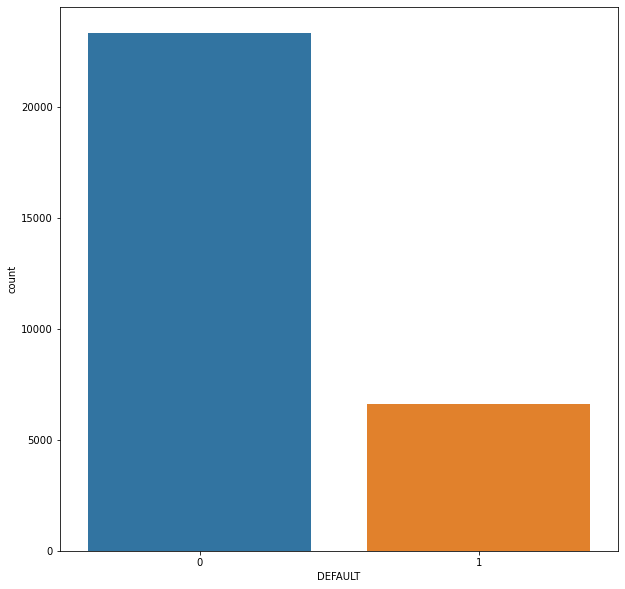

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x='DEFAULT', data=df)
plt.show()

In [23]:
print(df.describe().T)

                 count           mean            std       min      25%  \
LIMIT_BAL      29965.0  167442.005006  129760.135222   10000.0  50000.0   
AGE            29965.0      35.487969       9.219459      21.0     28.0   
BILL_AMT_SEPT  29965.0   51283.009778   73658.132403 -165580.0   3595.0   
BILL_AMT_AUG   29965.0   49236.366294   71195.567392  -69777.0   3010.0   
BILL_AMT_JUL   29965.0   47067.916069   69371.352323 -157264.0   2711.0   
BILL_AMT_JUN   29965.0   43313.329885   64353.514373 -170000.0   2360.0   
BILL_AMT_MAY   29965.0   40358.334390   60817.130623  -81334.0   1787.0   
BILL_AMT_APR   29965.0   38917.012281   59574.147742 -339603.0   1262.0   
PAY_AMT_SEPT   29965.0    5670.099316   16571.849467       0.0   1000.0   
PAY_AMT_AUG    29965.0    5927.983180   23053.456645       0.0    850.0   
PAY_AMT_JUL    29965.0    5231.688837   17616.361124       0.0    390.0   
PAY_AMT_JUN    29965.0    4831.617454   15674.464538       0.0    300.0   
PAY_AMT_MAY    29965.0   

In [24]:
default_0 = df[df['DEFAULT']==0]
default_1 = df[df['DEFAULT']==1]

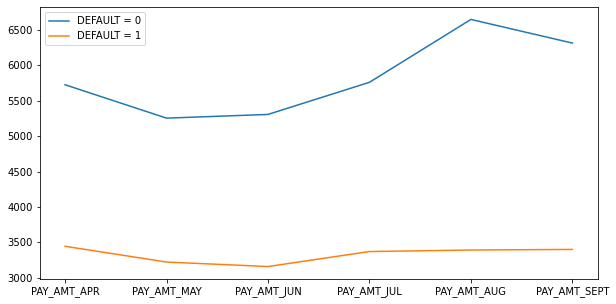

In [30]:
pay_amts = ['PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN', 'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEPT']
pay_means_0 = [default_0[col].mean() for col in pay_amts]
pay_means_1 = [default_1[col].mean() for col in pay_amts]

plt.figure(figsize=(10, 5))
plt.plot(pay_amts, pay_means_0, label="DEFAULT = 0")
plt.plot(pay_amts, pay_means_1, label="DEFAULT = 1")
plt.legend(loc="upper left")

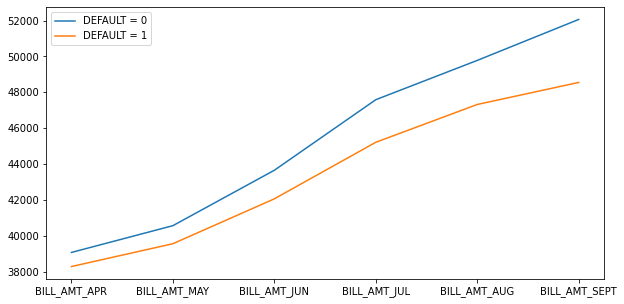

In [31]:
bill_amts = ['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEPT']
bill_means_0 = [default_0[col].mean() for col in bill_amts]
bill_means_1 = [default_1[col].mean() for col in bill_amts]

plt.figure(figsize=(10, 5))
plt.plot(bill_amts, bill_means_0, label="DEFAULT = 0")
plt.plot(bill_amts, bill_means_1, label="DEFAULT = 1")
plt.legend(loc="upper left")

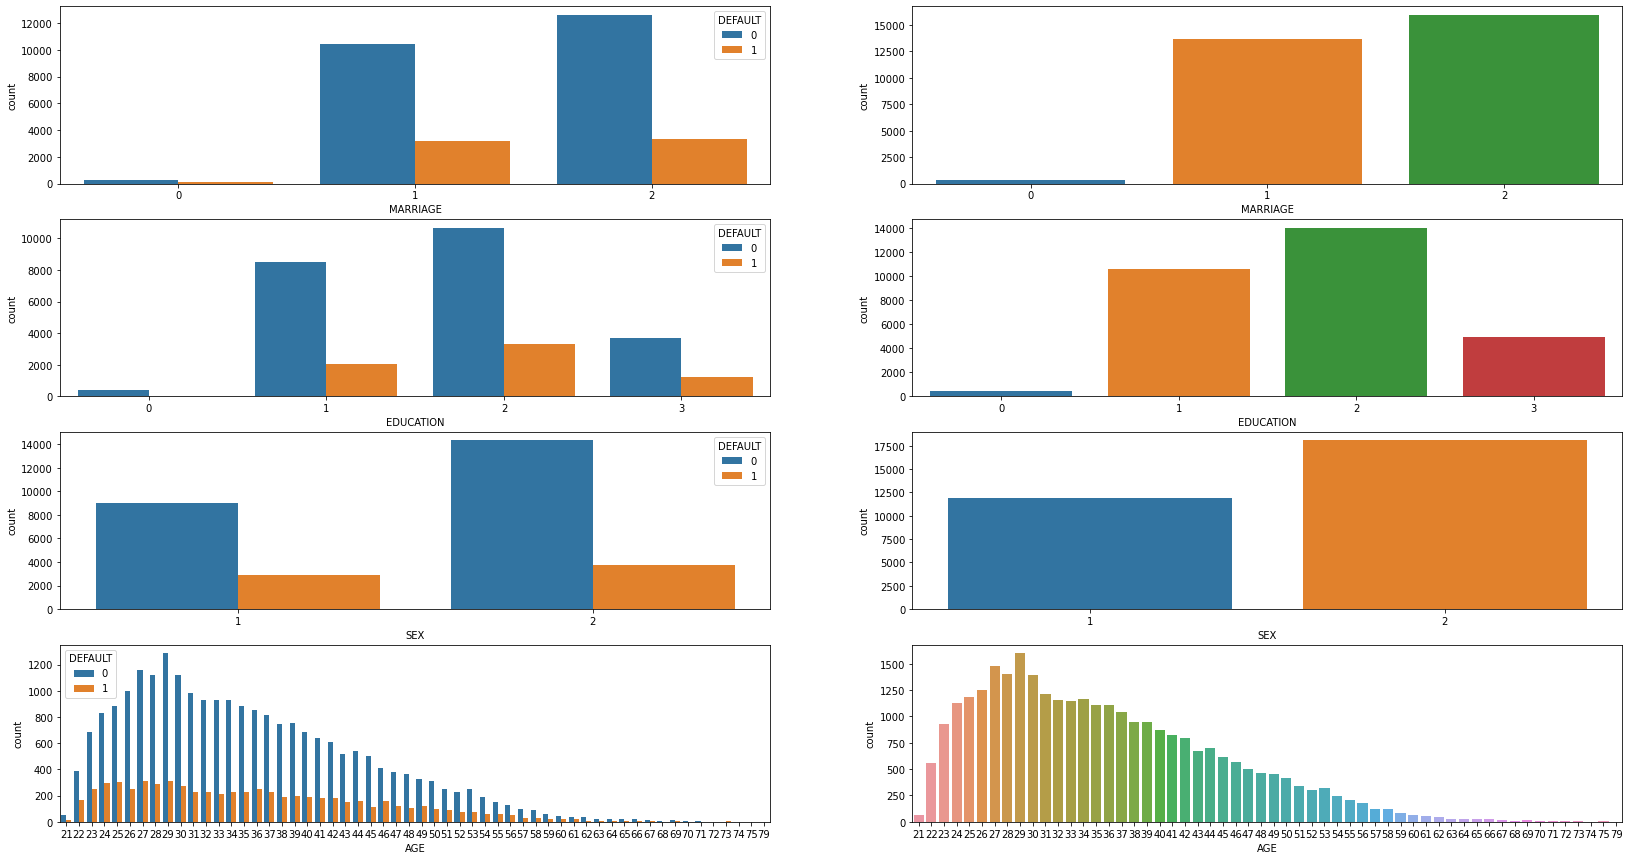

In [27]:
categoricals = ['MARRIAGE', 'EDUCATION', 'SEX', 'AGE']

fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(28,15))

for i in range(0,len(categoricals)):
    sns.countplot(x=df[categoricals[i]], hue = df['DEFAULT'],ax = axes[i][0] )
    sns.countplot(x=df[categoricals[i]],ax = axes[i][1])

In [33]:
df.to_csv('UCI_Credit_Card_Clean.csv')